<a href="https://colab.research.google.com/github/antlobach/pytorch-stuff/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import torch
from torch import tensor
import numpy

In [2]:
torch.__version__

'2.10.0+cu128'

In [3]:
torch.cuda.is_available()

True

In [4]:
t1 = torch.tensor(1)

In [5]:
t1

tensor(1)

In [6]:
t1.unsqueeze(0).unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 1])

In [7]:
t1.dtype

torch.int64

In [8]:
t2 = tensor([[1, 2, 3], [4, 5, 6]])

In [9]:
t3 = tensor([[7, 8, 9], [10, 11, 12]])

In [10]:
t2.shape

torch.Size([2, 3])

In [11]:
t3.shape

torch.Size([2, 3])

In [12]:
t3.shape

torch.Size([2, 3])

In [13]:
t3_t = t3.T

In [14]:
t3_t

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])

In [15]:
t2.shape

torch.Size([2, 3])

In [16]:
t3_t.shape

torch.Size([3, 2])

In [17]:
t4 = t2.matmul(t3_t)

In [18]:
t4

tensor([[ 50,  68],
        [122, 167]])

In [19]:
t4.shape

torch.Size([2, 2])

In [20]:
t2.mul(t3)

tensor([[ 7, 16, 27],
        [40, 55, 72]])

In [21]:
tensor([1, 2, 3]).dot(tensor([4, 5, 6]))

tensor(32)

In [22]:
tensor([1, 2, 3]).matmul(t3_t) # 1x3 matmul 3x2 -> 1x2

tensor([50, 68])

In [23]:
t3.matmul(tensor([1, 2, 3]))

tensor([50, 68])

In [24]:
tensor([1, 2, 3]) @ t3.T

tensor([50, 68])

In [25]:
t3 @ t3.T

tensor([[194, 266],
        [266, 365]])

In [26]:
torch.randn(2, 3).T @ torch.randn(2, 3)

tensor([[-1.9497, -1.1352,  0.9089],
        [ 0.9567,  0.7842, -0.8599],
        [ 0.5779,  0.8534, -1.2113]])

In [27]:
import torch.nn.functional as F

In [28]:
x = 100.0 * torch.randn(100)
y = torch.randint(0, 1, (len(x), ), dtype=torch.float)

In [29]:
x.shape

torch.Size([100])

In [30]:
y.shape

torch.Size([100])

In [31]:
w1 = tensor([3.3], requires_grad=True)
b0 = tensor([10.0], requires_grad=True)
z1 = b0 + x * w1
a1 = F.sigmoid(z1)

In [32]:
loss = F.binary_cross_entropy(a1, y)
print(loss)

tensor(42.0993, grad_fn=<BinaryCrossEntropyBackward0>)


In [33]:
from torch.autograd import grad

In [34]:
dL_dw1 = grad(loss, w1, retain_graph=True)

In [35]:
dL_db0 = grad(loss, b0, retain_graph=True)

In [36]:
dL_dw1

(tensor([-0.0078]),)

In [37]:
loss.backward()

In [38]:
w1.grad

tensor([-0.0078])

In [39]:
b0.grad

tensor([0.0118])

In [40]:
loss

tensor(42.0993, grad_fn=<BinaryCrossEntropyBackward0>)

In [41]:
w1

tensor([3.3000], requires_grad=True)

In [42]:
b0

tensor([10.], requires_grad=True)

In [43]:
import torch.nn as nn

In [44]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(num_inputs, 4),
            torch.nn.ReLU(),
            torch.nn.Linear(4, 2),
            torch.nn.ReLU(),
            torch.nn.Linear(2, num_outputs)
        )
    def forward(self, x):
        return self.layers(x)

In [45]:
mlp = MLP(50, 3)

In [46]:
print(mlp)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=3, bias=True)
  )
)


In [47]:
X = torch.rand((1, 50))

In [48]:
mlp(X)

tensor([[ 0.2803,  0.5802, -0.1632]], grad_fn=<AddmmBackward0>)

In [49]:
out = mlp.forward(X)
out

tensor([[ 0.2803,  0.5802, -0.1632]], grad_fn=<AddmmBackward0>)

In [50]:
with torch.no_grad():
  out = mlp.forward(X)
  print(out)

tensor([[ 0.2803,  0.5802, -0.1632]])


In [51]:
from torch.utils.data import Dataset

In [91]:
class ToyDataset(Dataset):
  def __init__(self, X, y):
    self.features = X
    self.labels = y

  def __getitem__(self, index):
    one_x = self.features[index]
    one_y = self.labels[index]
    return one_x, one_y

  def __len__(self):
    return self.labels.shape[0]

In [92]:
# torch.randint(0, 3, (1000, ))

In [179]:
# n_train = 1000
# n_test = 20

# x_train = torch.randn((n_train, 50))
# y_train = torch.randint(0, 3, (n_train, ))

# x_test = torch.randn((n_test, 50))
# y_test = torch.randint(0, 3, (n_test, ))

import torch

torch.manual_seed(0)

n_train = 100000
n_test = 20
d = 1000
n_classes = 3

# Class means
class_means = torch.randn(n_classes, d) * 3.0

def sample(n):
    y = torch.randint(0, n_classes, (n,))
    x = class_means[y] + 0.5 * torch.randn(n, d)
    return x, y

x_train, y_train = sample(n_train)
x_test, y_test = sample(n_test)

In [180]:
x_train.shape

torch.Size([100000, 1000])

In [181]:
train_ds = ToyDataset(x_train, y_train)
test_ds = ToyDataset(x_test, y_test)

In [182]:
train_ds[0][0].shape

torch.Size([1000])

In [183]:
from torch.utils.data import DataLoader

In [184]:
torch.manual_seed(123)

In [185]:
train_loader = DataLoader(dataset=train_ds,
                          batch_size=2,
                          shuffle=True,
                          num_workers=0)

In [186]:
test_loader = DataLoader(dataset=test_ds,
                         batch_size=2,
                         shuffle=False,
                         num_workers=0)

In [187]:
len(train_loader)

50000

In [188]:
# list(map(lambda xs: print(xs[0], xs[1][0], xs[1][1]), enumerate(train_loader)))

In [189]:
# for idx, (x, y) in enumerate(train_loader):
#     print(f"Batch {idx+1}:", x, y)

# Training

In [207]:
torch.manual_seed(123)

In [208]:
x_train.shape

torch.Size([100000, 1000])

In [209]:
len(numpy.unique(y_train))

3

In [210]:
model = MLP(num_inputs=x_train.shape[1], num_outputs=len(numpy.unique(y_train)))

In [211]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [212]:
num_epochs = 1

In [213]:
len(train_loader)

50000

In [ ]:
loss_vals = tensor(range(num_epochs),
                   dtype = torch.float,
                   requires_grad=False)

for epoch in range(num_epochs):

  loss_vals_epoch = tensor(range(len(train_loader)), dtype = torch.float).detach()

  model.train()
  for batch_indx, (features, labels) in enumerate(train_loader):

    # Forward pass
    logits = model(features)

    # Compute loss
    loss = F.cross_entropy(logits, labels)

    optimizer.zero_grad() # Reset grads

    loss.backward() # Compute gradients

    optimizer.step() # Update the paremeters

    loss_vals_epoch[batch_indx] = loss

    if batch_indx % 10_000 == 0:
      print(f"Epoch {epoch+1:03d}/{num_epochs:03d}",
            f" | Batch {batch_indx+1:03d}/{len(train_loader)}",
            f" | Loss: {loss:.2f}")

  loss_vals[epoch] = loss_vals_epoch.mean()

Epoch 001/001  | Batch 001/50000  | Loss: 0.71
Epoch 001/001  | Batch 10001/50000  | Loss: 0.01
Epoch 001/001  | Batch 20001/50000  | Loss: 0.01
Epoch 001/001  | Batch 30001/50000  | Loss: 0.00


In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
loss_vals

In [ ]:
plt.figure()
plt.plot(loss_vals.detach().numpy())
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Tensor Values")
plt.show()

In [ ]:
model.eval()

with torch.no_grad():
    outputs = model(x_train)

print(outputs)

In [73]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

tensor([[0.9935, 0.0064, 0.0002],
        [0.9934, 0.0065, 0.0001],
        [0.0001, 0.9999, 0.0000],
        ...,
        [0.9934, 0.0061, 0.0005],
        [0.0068, 0.0000, 0.9932],
        [0.9934, 0.0065, 0.0001]])


In [74]:
torch.argmax(probas, dim=1).shape

torch.Size([1000])

# Training GPU

In [87]:
device = torch.device("cuda")

model = MLP(num_inputs=50, num_outputs=3)
model.to(device)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=3, bias=True)
  )
)

In [88]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [89]:
num_epochs = 100

In [90]:
loss_vals = tensor(range(num_epochs), dtype = torch.float, requires_grad=False)

for epoch in range(num_epochs):

  loss_vals_epoch = tensor(range(len(train_loader)), dtype = torch.float).detach()

  model.train()
  for batch_indx, (features, labels) in enumerate(train_loader):

    # Forward pass
    logits = model(features.to(device))

    # Compute loss
    loss = F.cross_entropy(logits, labels.to(device))

    optimizer.zero_grad() # Reset grads

    loss.backward() # Compute gradients

    optimizer.step() # Update the paremeters

    loss_vals_epoch[batch_indx] = loss

    print(f"Epoch {epoch+1:03d}/{num_epochs:03d}",
          f" | Batch {batch_indx+1:03d}/{len(train_loader)}",
          f" | Loss: {loss:.2f}")

  loss_vals[epoch] = loss_vals_epoch.mean()

Streaming output truncated to the last 5000 lines.
Epoch 091/100  | Batch 001/500  | Loss: 0.00
Epoch 091/100  | Batch 002/500  | Loss: 0.00
Epoch 091/100  | Batch 003/500  | Loss: 0.00
Epoch 091/100  | Batch 004/500  | Loss: 0.00
Epoch 091/100  | Batch 005/500  | Loss: 0.00
Epoch 091/100  | Batch 006/500  | Loss: 0.00
Epoch 091/100  | Batch 007/500  | Loss: 0.00
Epoch 091/100  | Batch 008/500  | Loss: 0.00
Epoch 091/100  | Batch 009/500  | Loss: 0.00
Epoch 091/100  | Batch 010/500  | Loss: 0.00
Epoch 091/100  | Batch 011/500  | Loss: 0.00
Epoch 091/100  | Batch 012/500  | Loss: 0.00
Epoch 091/100  | Batch 013/500  | Loss: 0.00
Epoch 091/100  | Batch 014/500  | Loss: 0.00
Epoch 091/100  | Batch 015/500  | Loss: 0.00
Epoch 091/100  | Batch 016/500  | Loss: 0.00
Epoch 091/100  | Batch 017/500  | Loss: 0.00
Epoch 091/100  | Batch 018/500  | Loss: 0.00
Epoch 091/100  | Batch 019/500  | Loss: 0.00
Epoch 091/100  | Batch 020/500  | Loss: 0.00
Epoch 091/100  | Batch 021/500  | Loss: 0.00
Epoc

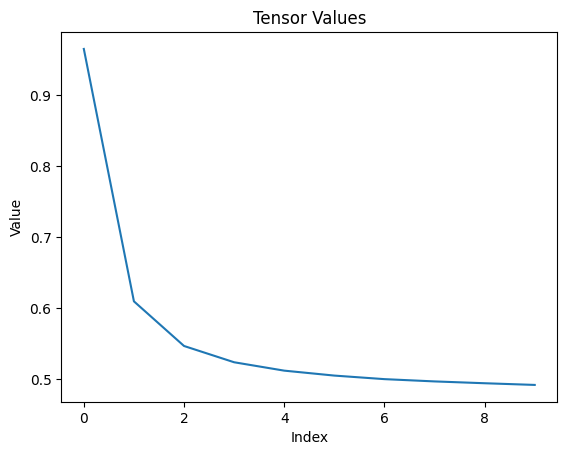

In [84]:
plt.figure()
plt.plot(loss_vals.detach().numpy())
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Tensor Values")
plt.show()